<a href="https://colab.research.google.com/github/risper25/-MNIST-handwriten-numbers-recognition-/blob/master/Tourism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
#open csv
dir_train="./train.csv"
train=pd.read_csv(dir_train)
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [32]:
dir_test="./test.csv"
test=pd.read_csv(dir_test)

In [3]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
def get_null_cols(num,data):
    return {col:data[col].isnull().sum() for col in data.columns if data[col].isnull().sum()>num}

In [5]:
#check columns that have null values.
get_null_cols(0,train)


{'LotFrontage': 259,
 'Alley': 1369,
 'MasVnrType': 8,
 'MasVnrArea': 8,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinType2': 38,
 'Electrical': 1,
 'FireplaceQu': 690,
 'GarageType': 81,
 'GarageYrBlt': 81,
 'GarageFinish': 81,
 'GarageQual': 81,
 'GarageCond': 81,
 'PoolQC': 1453,
 'Fence': 1179,
 'MiscFeature': 1406}

In [41]:
#drop columns with more  than 1000 missing values
col_drop=get_null_cols(1000,train)
col_drop=list(col_drop.keys())
train=train.drop(col_drop,axis=1)
get_null_cols(0,train)


{}

In [8]:
#categorical columns
def get_categorical(df):
    return df.select_dtypes(include='object').columns.tolist()  
#numerical columns
def get_numerical(df):
    return df.select_dtypes(exclude='object').columns.tolist()

#get_numerical(train[get_null_cols()])


In [9]:
from sklearn.impute import SimpleImputer
def impute_null_val(strategy,null_columns,data):
    imputer = SimpleImputer(missing_values=np.NaN, strategy=strategy)
    data[null_columns]=imputer.fit_transform(data[null_columns])


In [10]:
#replace categorical columns  with most freaquent value
cat_null=get_categorical(train[get_null_cols(0,train)])
impute_null_val('most_frequent',cat_null,train)
#replace missing numerical columns with their mean
num_null=get_numerical(train[get_null_cols(0,train)])
impute_null_val('mean',num_null,train)
get_null_cols(0,train)

{}

In [11]:
from sklearn import preprocessing 
categ=get_categorical(train)
# Encode Categorical Columns
le = preprocessing.LabelEncoder()
train[categ] = train[categ].apply(le.fit_transform)

In [12]:
train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,250000


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory.

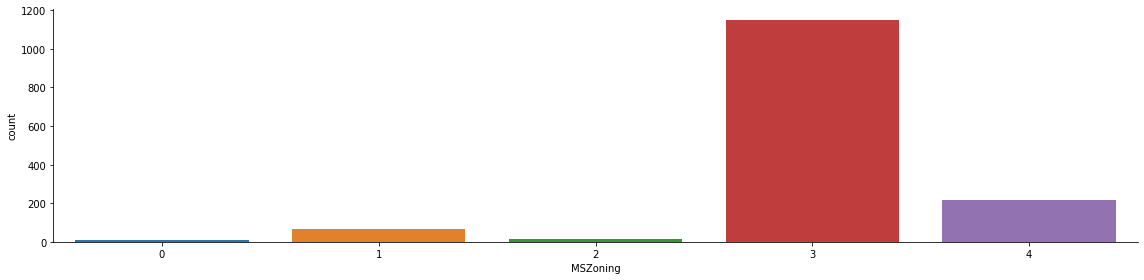

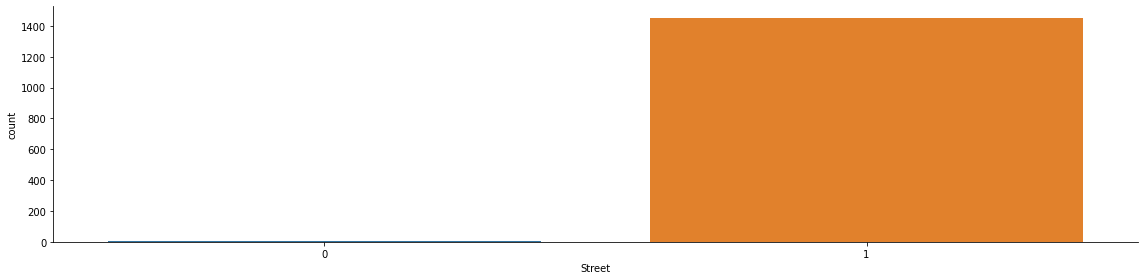

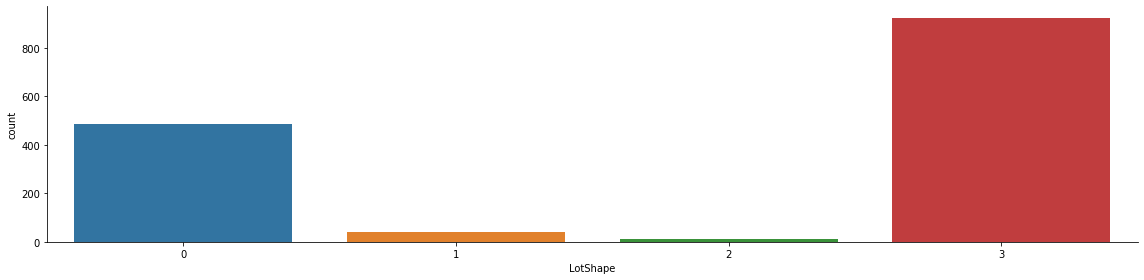

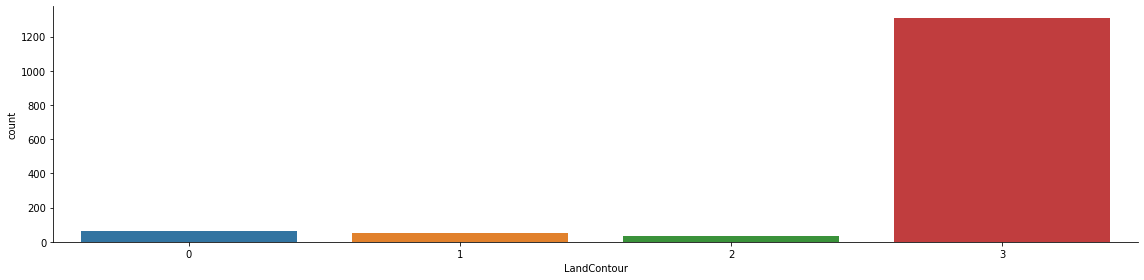

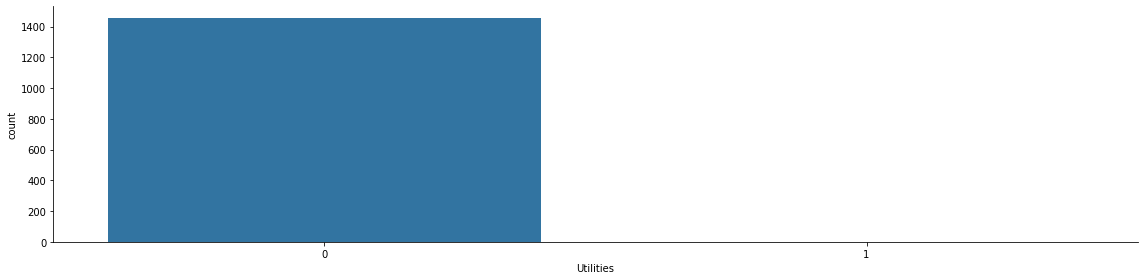

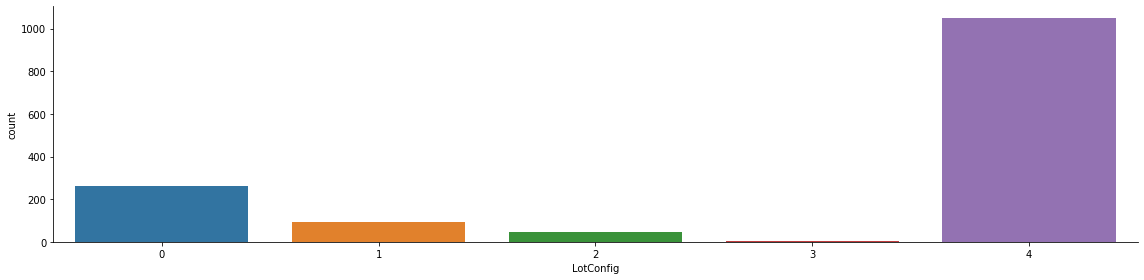

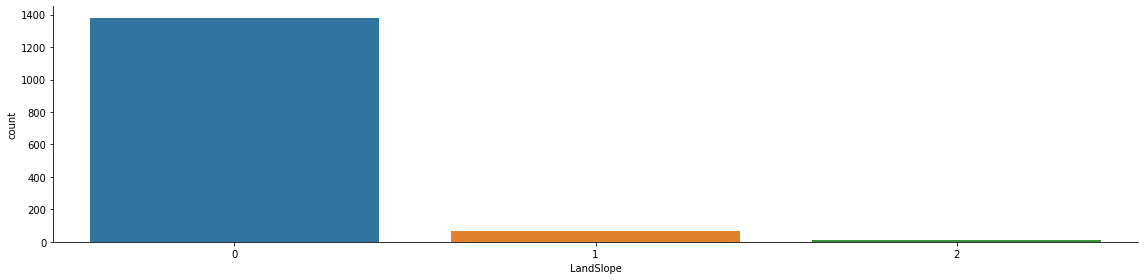

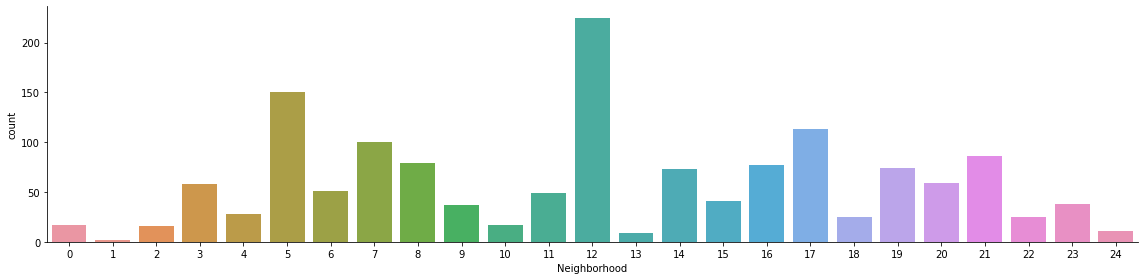

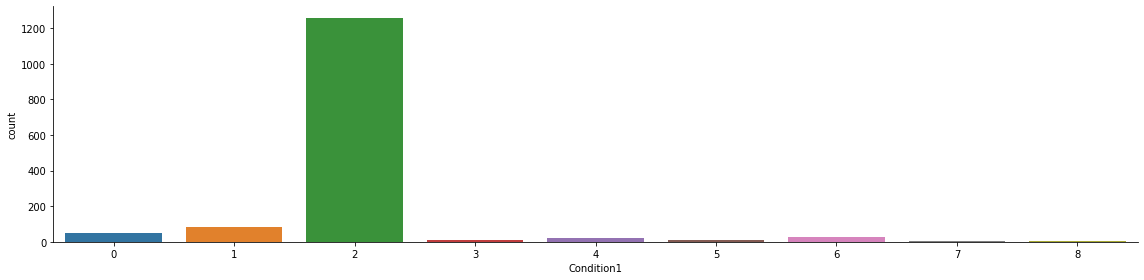

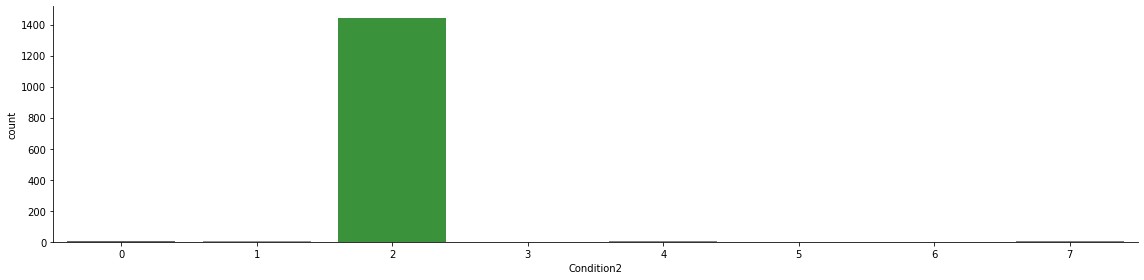

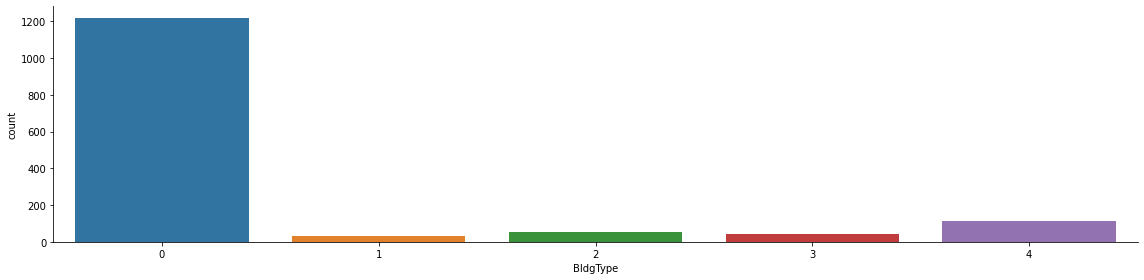

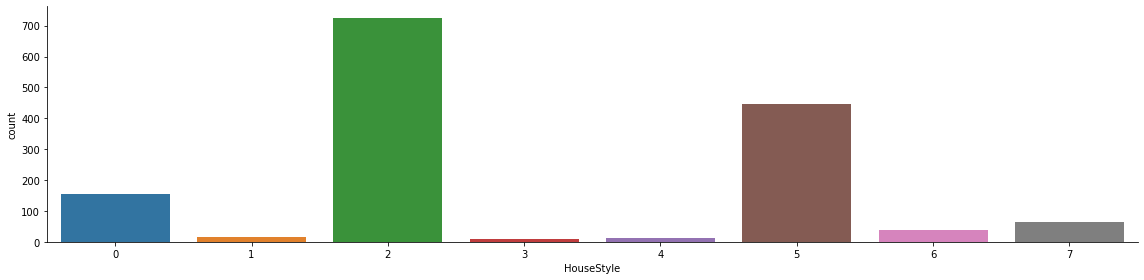

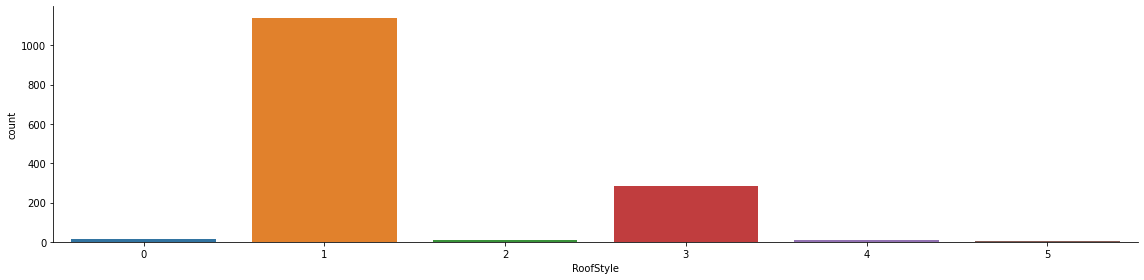

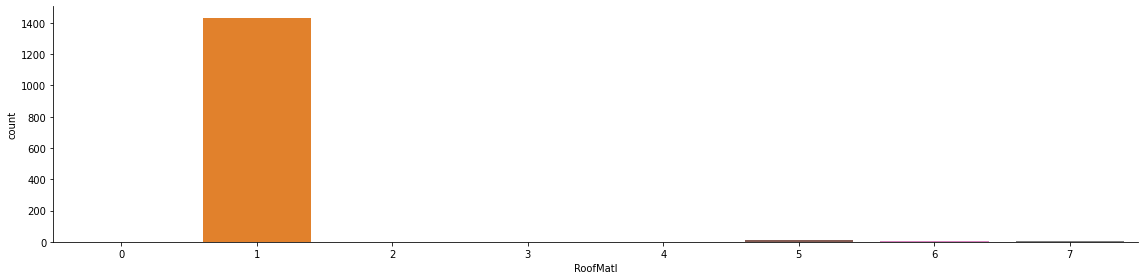

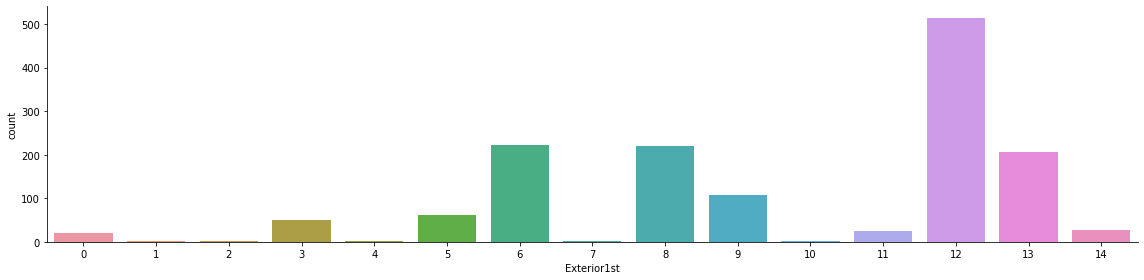

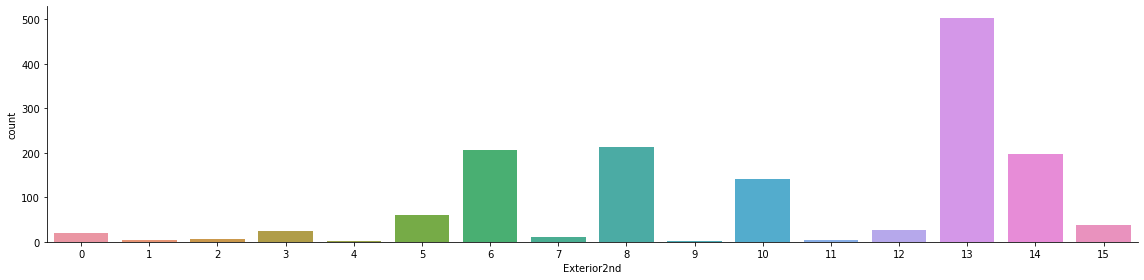

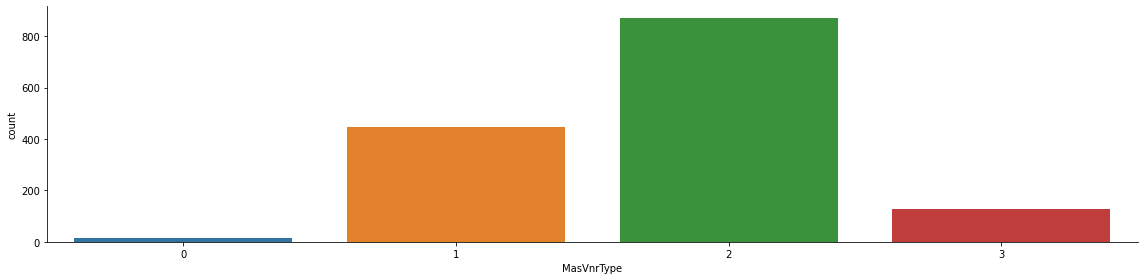

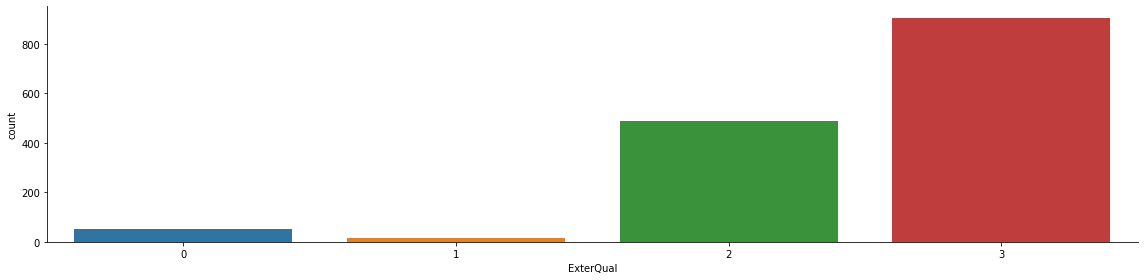

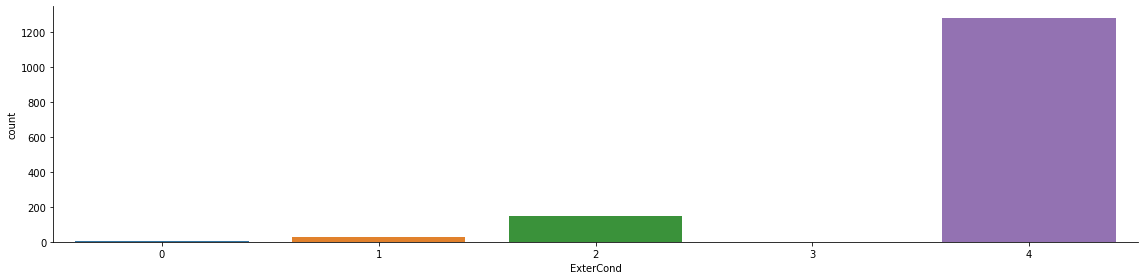

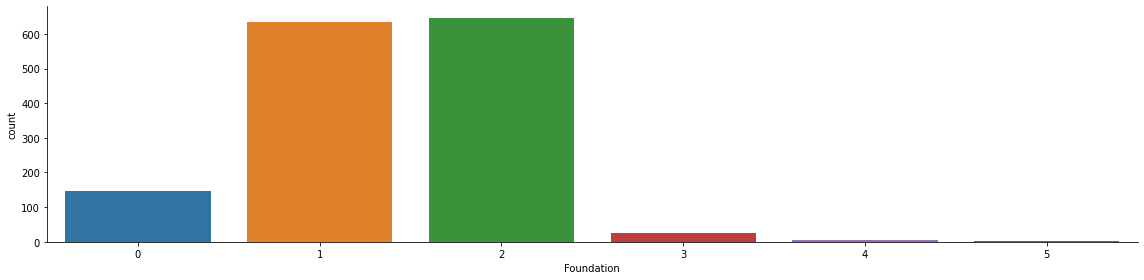

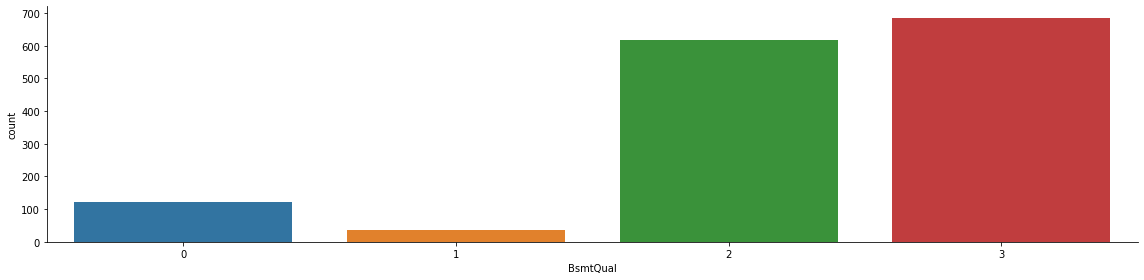

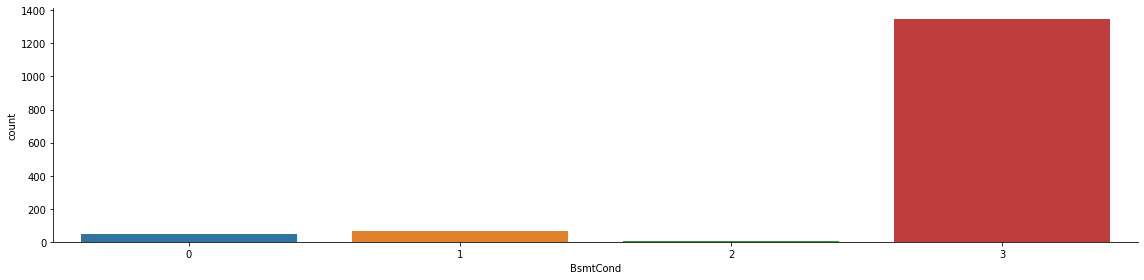

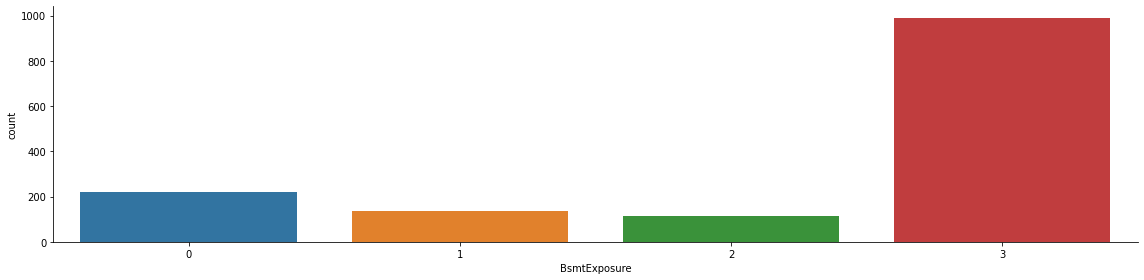

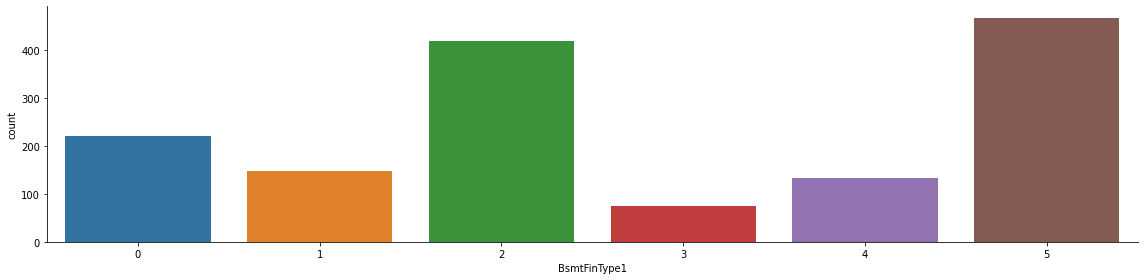

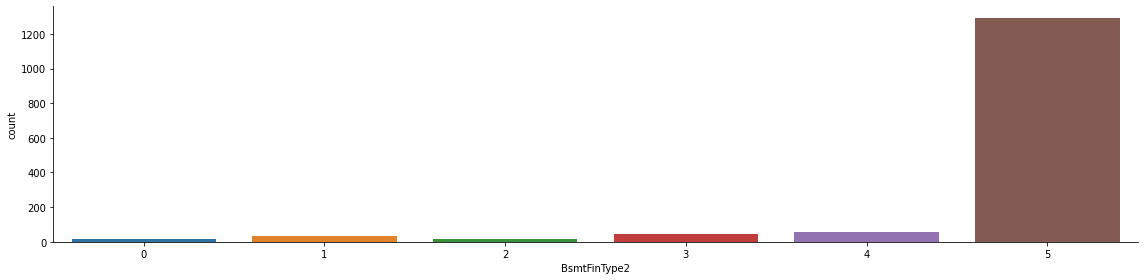

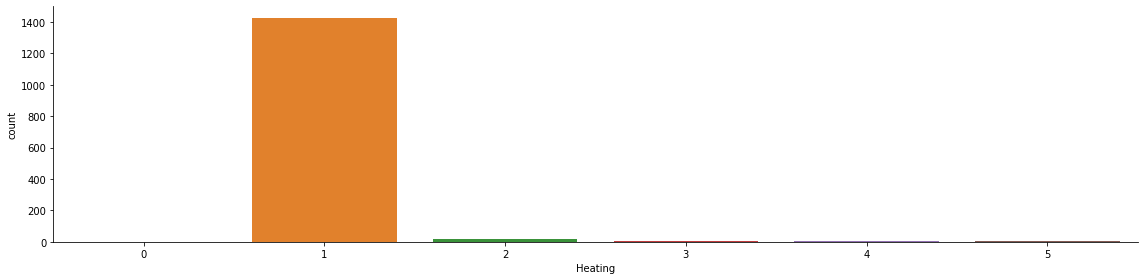

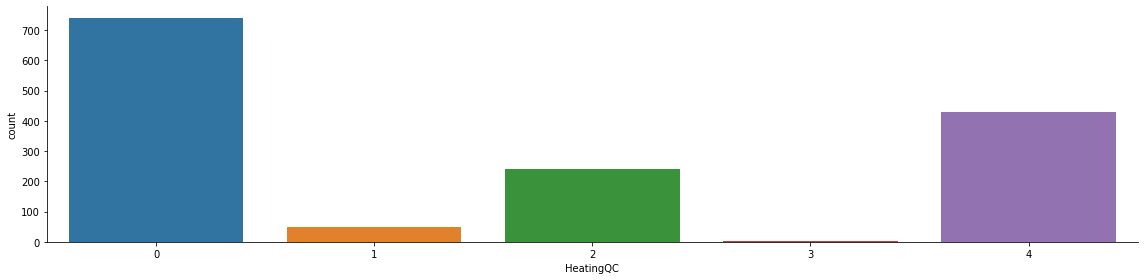

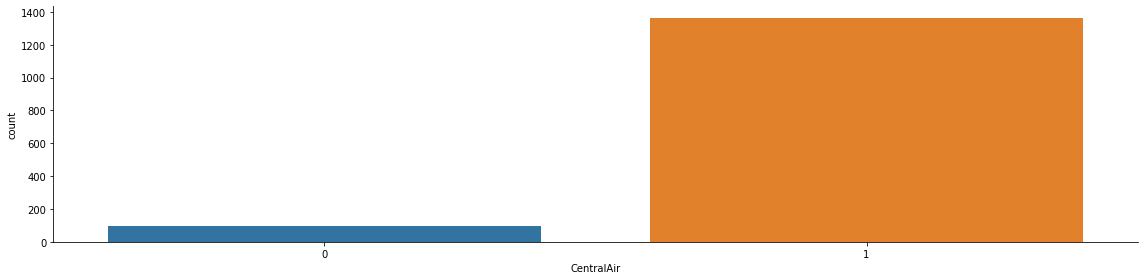

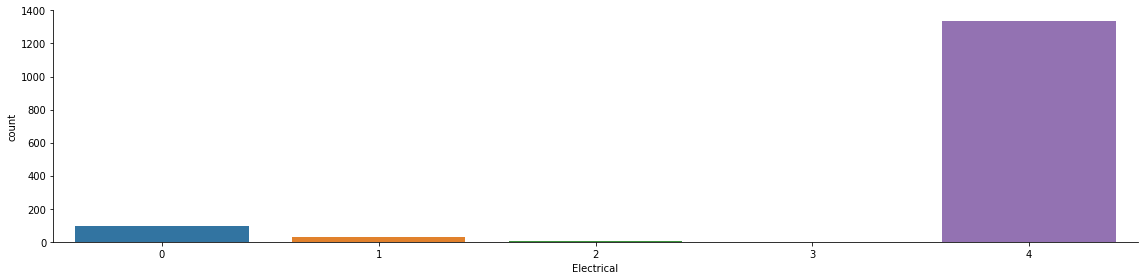

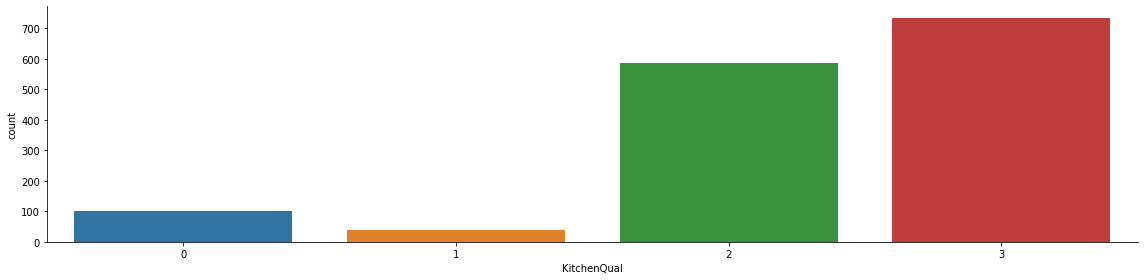

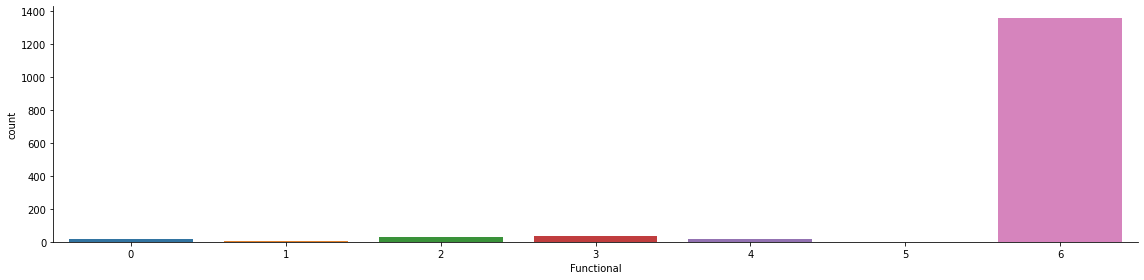

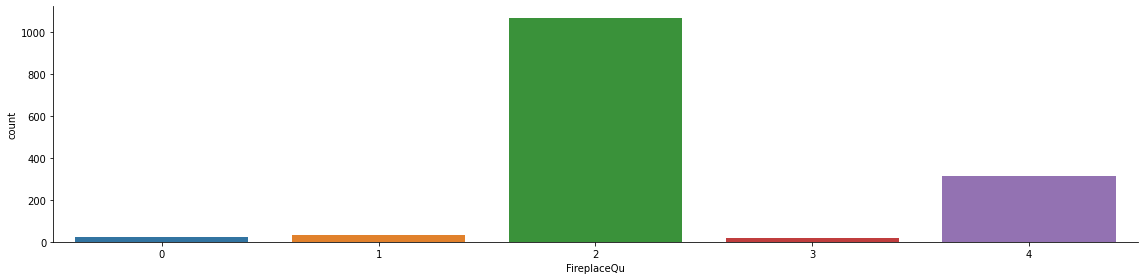

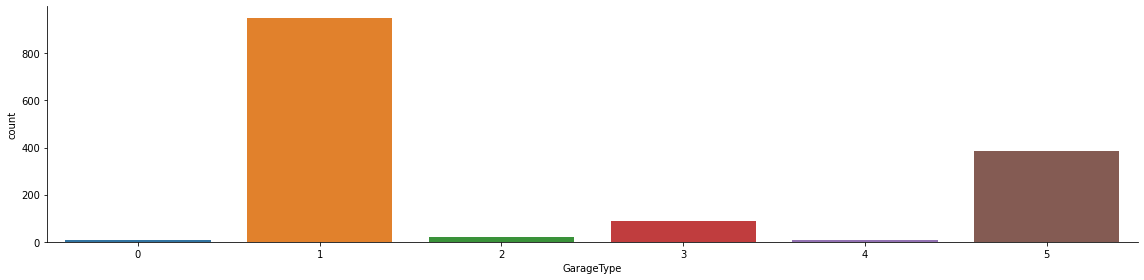

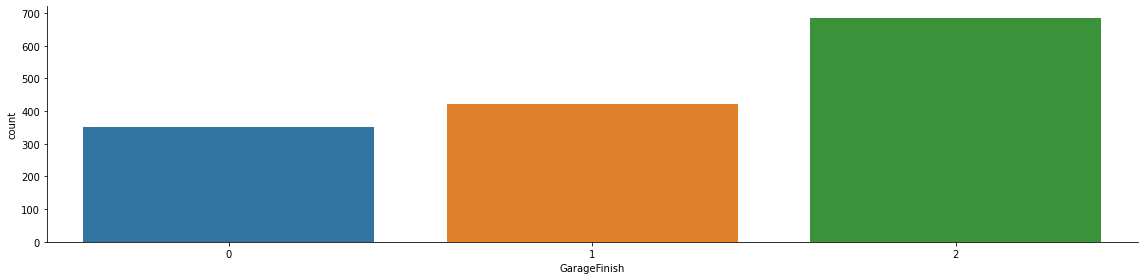

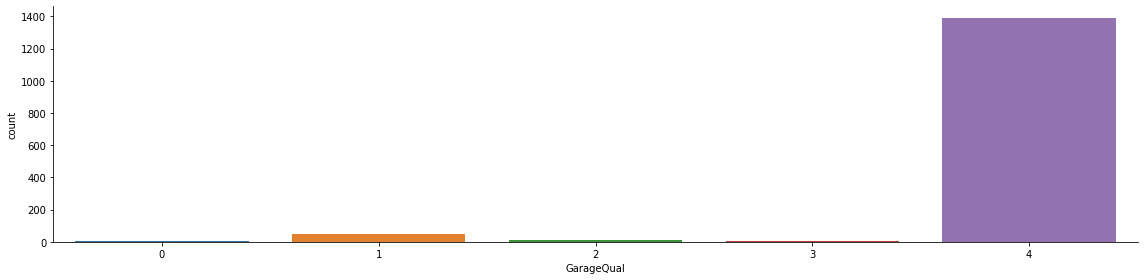

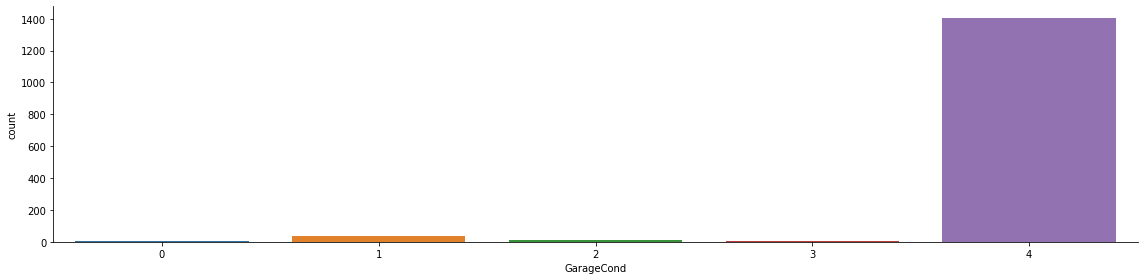

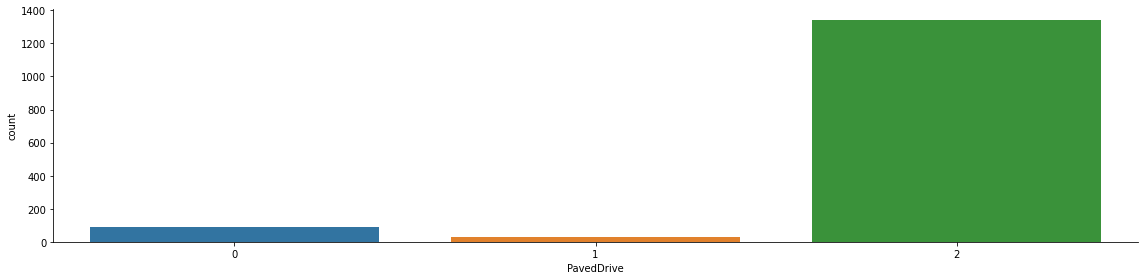

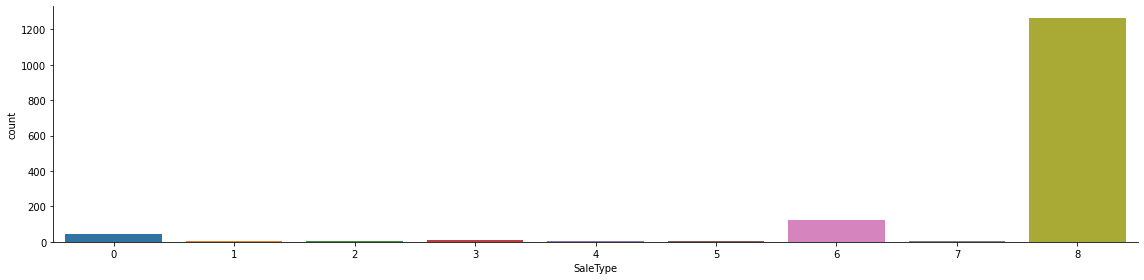

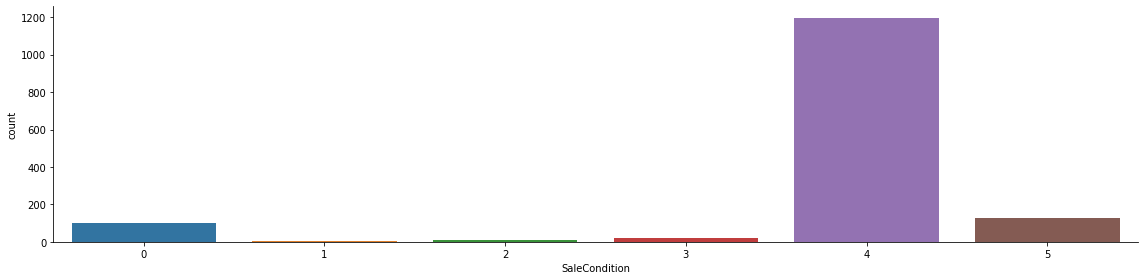

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
#check skewness on ctegorical features
def bar_plot(feature):
    sns.catplot(x=feature, kind="count", data=train,height=4, aspect=4)
    
for c in categ:    
    bar_plot(c)   

In [31]:
'''def plot_correlation(data, str="a"):
    plt.title(str)  
    sns.heatmap(data.corr(),annot=True, linewidths=.5)
    plt.show()
plot_correlation(train)'''

'def plot_correlation(data, str="a"):\n    plt.title(str)  \n    sns.heatmap(data.corr(),annot=True, linewidths=.5)\n    plt.show()\nplot_correlation(train)'

In [14]:
y_train=train["SalePrice"]
train=train.drop("SalePrice",axis=1)


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train, y_train,
                                                  test_size = 0.2, random_state=42)

In [20]:
from sklearn import linear_model
#modeling
#define model
model=linear_model.LinearRegression()
#fit model
model.fit(X_train,y_train)
pred=model.predict(X_valid)

In [21]:
from sklearn.metrics import mean_absolute_error
err_valid=mean_absolute_error(y_valid, pred)
print("error valid",err_valid)

error valid 21627.1961354588


In [23]:
dir_test="./test.csv"
test=pd.read_csv(dir_test)
get_null_cols(0,test)

{'MSZoning': 4,
 'LotFrontage': 227,
 'Alley': 1352,
 'Utilities': 2,
 'Exterior1st': 1,
 'Exterior2nd': 1,
 'MasVnrType': 16,
 'MasVnrArea': 15,
 'BsmtQual': 44,
 'BsmtCond': 45,
 'BsmtExposure': 44,
 'BsmtFinType1': 42,
 'BsmtFinSF1': 1,
 'BsmtFinType2': 42,
 'BsmtFinSF2': 1,
 'BsmtUnfSF': 1,
 'TotalBsmtSF': 1,
 'BsmtFullBath': 2,
 'BsmtHalfBath': 2,
 'KitchenQual': 1,
 'Functional': 2,
 'FireplaceQu': 730,
 'GarageType': 76,
 'GarageYrBlt': 78,
 'GarageFinish': 78,
 'GarageCars': 1,
 'GarageArea': 1,
 'GarageQual': 78,
 'GarageCond': 78,
 'PoolQC': 1456,
 'Fence': 1169,
 'MiscFeature': 1408,
 'SaleType': 1}

In [24]:
#replace categorical columns  with most freaquent value
cat_null_test=get_categorical(test[get_null_cols(0,test)])
impute_null_val('most_frequent',cat_null_test,test)
#replace missing numerical columns with their mean
num_null_test=get_numerical(test[get_null_cols(0,test)])

impute_null_val('mean',num_null_test,test)

get_null_cols(0,test)

{}

In [31]:
from sklearn import preprocessing 
categ=get_categorical(test)
# Encode Categorical Columns
le = preprocessing.LabelEncoder()
test[categ] = test[categ].apply(le.fit_transform)

In [43]:
#drop columns with more  than 1000 missing values
test=test.drop(['Alley','Fence','MiscFeature','PoolQC'],axis=1)

In [44]:
test['total_cost']=model.predict(test)


In [46]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,total_cost
0,1461,20,2,80.0,11622,1,3,3,0,4,...,0,0,120,0,0,6,2010,8,4,104389.849759
1,1462,20,3,81.0,14267,1,0,3,0,0,...,0,0,0,0,12500,6,2010,8,4,147726.535537
2,1463,60,3,74.0,13830,1,0,3,0,4,...,0,0,0,0,0,3,2010,8,4,164296.706833
3,1464,60,3,78.0,9978,1,0,3,0,4,...,0,0,0,0,0,6,2010,8,4,179871.451040
4,1465,120,3,43.0,5005,1,0,1,0,4,...,0,0,144,0,0,1,2010,8,4,187156.478565


In [47]:
res = pd.concat([test['Id'], test['total_cost']], join = 'outer', axis = 1)
res

,Id,total_cost
0,1461,104389.849759
1,1462,147726.535537
2,1463,164296.706833
3,1464,179871.451040
4,1465,187156.478565
...,...,...
1454,2915,61691.160238
1455,2916,59478.680118
1456,2917,130708.538414
1457,2918,109194.476724
